# 🥣 **Analysis of Cereal Nutritional Content** 🥛

Importing standard libraries and data:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

cereal = pd.read_excel("C:\\Users\\gouri\\Downloads\\Cereals1.xls")
cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [ ]:
cereal.describe() 

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.723684,6.934211,93.657895,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,4.160444,4.473136,68.502565,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


Replacing the invalid negative values with the means of the corresponding columns:

In [ ]:
cereal["protein"].replace({-1: cereal["protein"].mean()}, inplace=True)
cereal["fat"].replace({-1: cereal["fat"].mean()}, inplace=True)
cereal["sodium"].replace({-1: cereal["sodium"].mean()}, inplace=True)
cereal["fiber"].replace({-1: cereal["fiber"].mean()}, inplace=True)
cereal["carbo"].replace({-1: cereal["carbo"].mean()}, inplace=True)
cereal["sugars"].replace({-1: cereal["sugars"].mean()}, inplace=True)
cereal["potass"].replace({-1: cereal["potass"].mean()}, inplace=True)
cereal["vitamins"].replace({-1: cereal["vitamins"].mean()}, inplace=True)

cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,93.657895,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.000000,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.000000,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.000000,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.000000,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.000000,25,1,1.0,1.00,51.592193


* The only columns containing "-1" as values are carbo, sugars, and potass
* The values for mean (using the describe function) are different for these columns before and after treating for missing values

In [ ]:
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.930575,7.038608,96.148892,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,3.737575,4.377048,66.688658,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.861842,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


Calculating the interquartile ranges for for each attribute:

In [ ]:
df = ["protein", "fat", "sodium", "fiber", "carbo", "sugars", "potass", "vitamins"]
for i in df:
    q1 = cereal[i].quantile(0.25)
    q3 = cereal[i].quantile(0.75)
    iqr = q3 - q1
    o1 = q1 - (1.5*iqr)
    o2 = q3 + (1.5*iqr)
    cereal.loc[(cereal[i] < o1) | (cereal[i] > o2), i] = cereal[i].median()

cereal.head(30)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3.0,5,15,2.00,8.0,8.0,135.000000,25,3,1.00,1.00,33.983679
1,All-Bran,K,C,70,4.0,1,260,1.75,7.0,5.0,90.000000,25,3,1.00,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4.0,0,140,1.75,8.0,0.0,90.000000,25,3,1.00,0.50,93.704912
3,Almond_Delight,R,C,110,2.0,2,200,1.00,14.0,8.0,93.657895,25,3,1.00,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2.0,2,180,1.50,10.5,10.0,70.000000,25,1,1.00,0.75,29.509541
5,Apple_Jacks,K,C,110,2.0,0,125,1.00,11.0,14.0,30.000000,25,2,1.00,1.00,33.174094
6,Basic_4,G,C,130,3.0,2,210,2.00,18.0,8.0,100.000000,25,3,1.33,0.75,37.038562
7,Bran_Chex,R,C,90,2.0,1,200,4.00,15.0,6.0,125.000000,25,1,1.00,0.67,49.120253
8,Bran_Flakes,P,C,90,3.0,0,210,5.00,13.0,5.0,190.000000,25,3,1.00,0.67,53.313813
9,Cap'n'Crunch,Q,C,120,1.0,2,220,0.00,12.0,12.0,35.000000,25,2,1.00,0.75,18.042851


Text(0, 0.5, 'Rating')

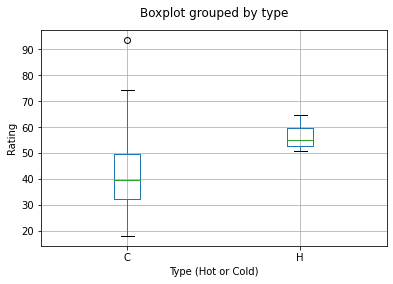

In [ ]:
bp = cereal.boxplot("rating", by = "type")
bp
bp.set_title('')
plt.xlabel("Type (Hot or Cold)")
plt.ylabel("Rating")

* Overall, cold cereals tend to have a lower rating than hot cereals do
* The median rating for cold cereals is lower than the median rating for hot cereals

* There is greater diversity in ratings among cold cereals than hot cereals
* Consumers tend to rate some brands of cold cereals much higher than any of the hot cereals

#### Heatmap:

Text(0.5, 1.0, 'Correlation between Sugars, Carbs, Fat, and Calories')

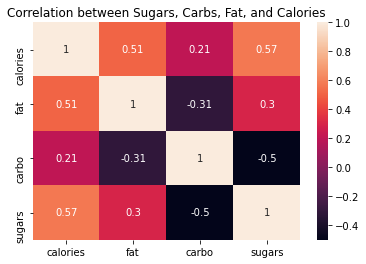

In [ ]:
sns.heatmap(cereal[["calories", "fat", "carbo", "sugars"]].corr(), annot=True, annot_kws={'size': 10})
plt.title("Correlation between Sugars, Carbs, Fat, and Calories")


* There are positive correlations between the following pairs:
* High positive correlations: (sugars, calories), (calories, fat)
* Lower positive correlations: (carbo, calories), (sugars, fat)
* Assumption: The higher the sugar and fat content of the cereal, the greater the number of calories

Text(0, 0.5, 'Consumer Rating')

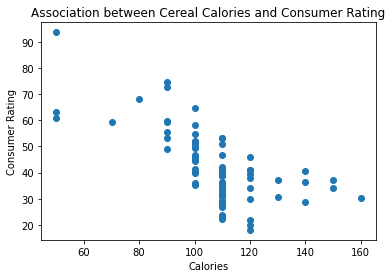

In [ ]:
plt.scatter(cereal["calories"], cereal["rating"])
plt.title("Association between Cereal Calories and Consumer Rating")
plt.xlabel("Calories")
plt.ylabel("Consumer Rating")

* The scatter plot above implies a low and negative Pearson's Correlation Coefficient
* This means that as the number of calories the cereal consists of increases, the consumer rating decreases
* However, this relationship is not strong enough to assume the same applies to every cereal brand

In [ ]:
# The correlation function displays a low and negative Pearson's Correlation Coefficient as illustrated above
cereal["calories"].corr(cereal["rating"])

-0.6743360496799723

Text(0, 0.5, 'Calories')

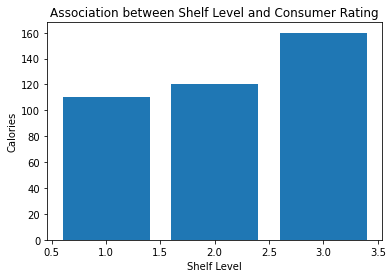

In [ ]:
plt.bar(cereal["shelf"], cereal["calories"])
plt.title("Association between Shelf Level and Consumer Rating")
plt.xlabel("Shelf Level")
plt.ylabel("Calories")

* As indicated by the bar graph above, there is a positive correlation coefficient between the variables shelf and calories.
* The higher the shelf the cereal is placed on, the greater the number of calories in the cereal

In [ ]:
# As suported by the bar graph, the Pearson's Correlation Coefficient for calories and shelf is small but positive.
cereal["calories"].corr(cereal["shelf"])

0.1250085852775354

Text(0, 0.5, 'Cereal Rating')

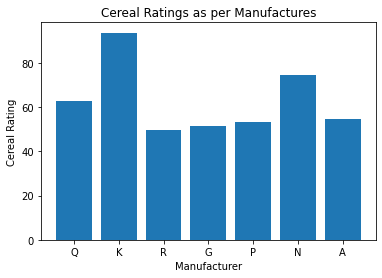

In [ ]:
plt.bar(cereal["mfr"], cereal["rating"])
plt.title("Cereal Ratings as per Manufactures")
plt.xlabel("Manufacturer")
plt.ylabel("Cereal Rating")

As seen from the bar graph above, Kellogs and Nabisco have the greatest ratings out of all the manufacturers

Text(0.5, 1.0, 'Correlations between Cereal Ratings and Different Nutrients')

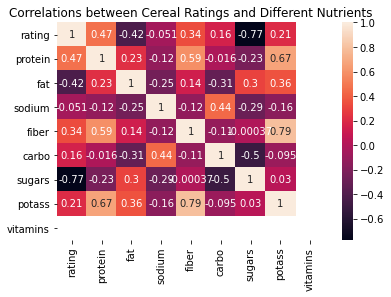

In [ ]:
sns.heatmap(cereal[["rating", "protein", "fat", "sodium", "fiber", "carbo", "sugars", "potass", "vitamins"]].corr(), annot=True, annot_kws={'size': 10})
plt.title("Correlations between Cereal Ratings and Different Nutrients")

* As indicated by the first column of the heat map provided below, the nutrient variables with the three highest correlations with ratings are
* Protein (0.47), fiber (0.34), and vitamins(0.21)
* Thus these are the most important for a good rating for a cereal